(file-types:Projectdoc)=
# Necessary Imports

For data analysis, 'pandas' library has been used. 

For working with regular expressions and enabling patterns 're' library has been used.

In [ ]:
import pandas as pd
import re

# Matching text patterns

Using tabula, the bank statement in pdf format was converted to csv file. 
The names written in the description column in the file have been replaced with the corresponding cafe name patterns.

- Fasshane was not added to the code when matching cafe names because no purchases were made from here during the period therefore the description is unknown.

In [ ]:
cafenames = {
    r"046 STARBUCKS IST SABANCI TEMASSIZ XXXX 8204": "Starbucks",
    r"134 SIMIT SARAYI SABANCU TEMASSIZ XXXX 8204": "Simit Sarayi",
    r"010 SABANCI UNIVERSITESI TEMASSIZ XXXX 8204": "Coffy",
    r"010 COFFY IDEALTEPE TEMASSIZ XXXX 8204": "Coffy",
    r"062 PIZZA RESTAURANTLARI XXXX 8204": "Coffy (Online Order)",
    r"064 EKMOT GIDA ANONIM SI TEMASSIZ XXXX 8204": "Espressolab",
    r"205 SELF GIDA SANAYI VE TEMASSIZ XXXX 8204": "Espressolab"
}


Reading the bank account data file.

In [ ]:
bankdata = pd.read_csv("tabula-AkbankMevduatEkstre.csv")

A function has defined to identify cafes in transaction descriptions. 

- re.search(): Searches for the pattern in the description 
- If match is found, name 'cafe' is returned. Otherwise return 'None'.

The 'bankdata' is filtered into the date, time and cafe name components. The results collected in the file named *cafelist*.

In [ ]:
def identifycafe(description):
    for pattern, cafe in cafenames.items():
        if re.search(pattern, description, re.IGNORECASE):
            return cafe
    return None

bankdata["Cafe"] = bankdata["Description"].apply(identifycafe)

realdata = bankdata[bankdata["Cafe"].notnull()][["Date", "Time", "Cafe"]]

realdata.to_csv("cafelist.csv", index=False)

**Output**

24/12/2024	12.28pm		Starbucks
24/12/2024	10.37am		Starbucks
19/12/2024	8.54pm		Starbucks
12/12/2024	6.19pm		Starbucks
12/12/2024	12.32pm		Starbucks
10/12/2024	3.09pm		Starbucks
09/12/2024	9.42pm		Coffy
08/12/2024	11.21pm		Espressolab
04/12/2024	10.37pm		Starbucks
03/12/2024	10.33pm 	Starbucks
02/12/2024	7.06pm		Starbucks
02/12/2024	4.48pm		Espressolab
28/11/2024	6.18pm		Starbucks
27/11/2024	2.31pm		Starbucks
27/11/2024	5.49pm		Espressolab
26/11/2024	5.46pm		Starbucks
25/11/2024	7.06pm		Starbucks
25/11/2024	4.42pm		Starbucks
19/11/2024	10.22am		Starbucks
12/11/2024	3.08pm		Espressolab
11/11/2024	7.19pm		Starbucks
11/11/2024	8.46am		Starbucks
10/11/2024	1.41pm		Coffy
07/11/2024	9.05am		Coffy
07/11/2024	9.04am		Coffy
05/11/2024	8.15am		Starbucks
05/11/2024	12.17pm		Coffy
05/11/2024	5.30pm		Coffy
05/11/2024	2.43pm		Coffy
04/11/2024	4.19pm		Starbucks
01/11/2024	5.18pm		Coffy
31/10/2024	4.51pm		Starbucks
31/10/2024	2.25pm		Starbucks
30/10/2024	9.07pm		Coffy
29/10/2024	9.33am		Starbucks
29/10/2024	9.32am		Starbucks
24/10/2024	1.25pm		Coffy
22/10/2024	2.44pm		Starbucks
21/10/2024	12.23pm		Starbucks
17/10/2024	1.13pm		Coffy
15/10/2024	2.42pm		Coffy
14/10/2024	3.56pm		Starbucks
14/10/2024	10.07pm		Coffy
11/10/2024	3.08pm		Espressolab
09/10/2024	9.11am		Starbucks
08/10/2024	8.28am		Starbucks
08/10/2024	9.28pm		Espressolab
02/10/2024	10.37am		Starbucks
01/10/2024	8.36am		Coffy
26/09/2024	7.46pm		Starbucks
26/09/2024	2.30pm		Simit Sarayı
25/09/2024	5.58pm		Espressolab
24/09/2024	10.44am		Coffy
24/09/2024	5.46pm		Espressolab
23/09/2024	9.29am	    Starbucks


![dist_preffered_coffee_shops_piechart.png](attachment:dist_preffered_coffee_shops_piechart.png)

![preferred_shops_permonth.jpg](attachment:preferred_shops_permonth.jpg)


# Formatting Google Calendar Data

Google calendar data has been published in pdf format covering the dates **23 September - 28 December.**

This pdf was then converted into a csv file using **Tabula.**

In order to make it easier to find the link about school density and cafe preference, this csv file has been formatted as _date, time, course name and location (the classroom where the course is taught)._

Because there was no data about the exam date,time and location in Google Calendar; it has been manually added to the csv file. 

In [ ]:
file_path = 'tabula-calendar_2024-09-23_2024-12-29.csv'  
calendardata = pd.read_csv(file_path, header=None)

calendardate = calendardata.iloc[0, 1:].values

calendarrealdata = []

for i in range(2, len(calendardata), 3):  
    time_row = calendardata.iloc[i - 1]
    lesson_row = calendardata.iloc[i]
    location_row = calendardata.iloc[i + 1]

    for col in range(1, len(calendardate) + 1):
        try:
            caldate = calendardate[col - 1]
            caltime = time_row[col]
            callesson = lesson_row[col]
            callocation = location_row[col]

            if pd.notnull(callesson) and pd.notnull(caltime) and pd.notnull(callocation):
                calendarrealdata.append({
                "Lesson Date": caldate,
                "Lesson Time": caltime,
                "Lesson Name": callesson,
                "Lesson Location": callocation
            })
        except IndexError:
            pass 

formattedcalendardata = pd.DataFrame(calendarrealdata)

formattedcalendardata['caldate'] = pd.to_datetime(formattedcalendardata['caldate'], format='%m/%d/%Y').dt.strftime('%d/%m/%Y')

examdata = [
    {"date": "10/11/2024", "time": "12:00pm", "lesson name": "DSA210 Midterm Exam", "location": "FASS G062"},
    {"date": "07/11/2024", "time": "3:40pm", "lesson name": "ENS204 Midterm 1 Exam", "location": "FENS G035"},
    {"date": "12/12/2024", "time": "3:40pm", "lesson name": "ENS204 Midterm 2 Exam", "location": "FENS G035"},
    {"date": "11/11/2024", "time": "09:40am", "lesson name": "ENS203 Midterm 1 Exam", "location": "FASS G018"},
    {"date": "09/12/2024", "time": "09:40am", "lesson name": "ENS203 Midterm 2 Exam", "location": "FENS L045"},
    {"date": "06/10/2024", "time": "05:40pm", "lesson name": "ENS211 Midterm Exam", "location": "FENS L029"}
]

exam_df = pd.DataFrame(examdata)
formattedcalendardata = pd.concat([formattedcalendardata, exam_df], ignore_index=True)

formattedcalendardata.to_csv('finalcalendardata.csv', index=False)


The data analyzed from these two sources will be examined on the **x-y scatter chart** to observe their spatial proximity to each other.

To make observation easier and more accurate, the locations on campus have been divided into the names of the closest coffee shops as indicated in the list below.

- **Simit Sarayi** - FENS
- **Starbucks** - UC,FMAN
- **Coffy** - FASS,IC,SL
- **Espressolab** - Dormitories 

In the following section, the locations of the data obtained from the calendar have been replaced with the names of the above-mentioned coffee shops corresponding to these locations.

In [ ]:

file_path = 'finalcalendardata.csv'  
calendar_data = pd.read_csv(file_path)


locationsdata = {
    'FENS': 'Simit Sarayi',
    'UC': 'Starbucks',
    'FMAN': 'Starbucks',
    'FASS': 'Coffy'
}

def changelocation(location):
    for key, value in locationsdata.items():
        if key in str(location): 
            return value
    return location  


calendar_data['Lesson Location'] = calendar_data['Lesson Location'].apply(changelocation)


calendar_data.to_csv('updatedfinalcalendardata.csv', index=False)



Calendar data has been filtered to leave only days on which coffee was purchased.

In [ ]:

cafe_data_path = 'cafelist.csv'  
calendar_data_path = 'updatedfinalcalendardata.csv'  

cafe_data = pd.read_csv(cafe_data_path)
calendar_data = pd.read_csv(calendar_data_path)

cafe_data['Date'] = pd.to_datetime(cafe_data['Date'], format='%d/%m/%Y')
calendar_data['Lesson Date'] = pd.to_datetime(calendar_data['Lesson Date'], format='%d/%m/%Y')

filtereddata = calendar_data[calendar_data['Lesson Date'].isin(cafe_data['Date'])]

filtereddata.to_csv('filteredcalendardata.csv', index=False)

**Output**

24/12/2024	8.40am	ENS204	Coffy
24/12/2024	10.40am	ENS204R	Coffy
24/12/2024	12.30pm	Piano Lesson	Starbucks
24/12/2024	1.40pm	ENS211	Coffy
24/12/2024	4.40pm	DSA210R	Simit Sarayi
19/12/2024	12.40pm	GER110D	Coffy
19/12/2024	2.40pm	DSA210B	Coffy
19/12/2024	3.40pm	ENS204	Simit Sarayi
12/12/2024	12.40pm	GER110D	Coffy
12/12/2024	2.40pm	DSA210B	Coffy
12/12/2024	3.40pm	ENS204	Simit Sarayi
10/12/2024	8.40am	ENS204	Coffy
10/12/2024	10.40am	ENS204R	Coffy
10/12/2024	12.30pm	Piano Lesson	Starbucks
10/12/2024	1.40pm	ENS211	Coffy
10/12/2024	4.40pm	DSA210R	Simit Sarayi
09/12/2024	9.40am	ENS203	Simit Sarayi
09/12/2024	1.40pm	ENS211	Simit Sarayi
09/12/2024	7.00pm	Meeting	Starbucks
08/12/2024	none 	none	none
04/12/2024	8.40am	GER110	Simit Sarayi
04/12/2024	5.40pm	ENS211R	Simit Sarayi
03/12/2024	8.40am	ENS204	Coffy
03/12/2024	10.40am	ENS204R	Coffy
03/12/2024	12.30pm	Piano Lesson	Starbucks
03/12/2024	1.40pm	ENS211	Coffy
03/12/2024	4.40pm	DSA210R	Simit Sarayi
02/12/2024	9.40am	ENS203	Simit Sarayi
02/12/2024	1.40pm	ENS211	Simit Sarayi
02/12/2024	7.00pm	Meeting	Starbucks
28/11/2024	12.40pm	GER110D	Coffy
28/11/2024	2.40pm	DSA210B	Coffy
28/11/2024	3.40pm	ENS204	Simit Sarayi
27/11/2024	8.40am	GER110	Simit Sarayi
27/11/2024	5.40pm	ENS211R	Simit Sarayi
26/11/2024	8.40am	ENS204	Coffy
26/11/2024	10.40am	ENS204R	Coffy
26/11/2024	12.30pm	Piano Lesson	Starbucks
26/11/2024	1.40pm	ENS211	Coffy
26/11/2024	4.40pm	DSA210R	Simit Sarayi
25/11/2024	9.40am	ENS203	Simit Sarayi
25/11/2024	1.40pm	ENS211	Simit Sarayi
25/11/2024	7.00pm	Meeting	Starbucks
19/11/2024	8.40am	ENS204	Coffy
19/11/2024	10.40am	ENS204R	Coffy
19/11/2024	12.30pm	Piano Lesson	Starbucks
19/11/2024	1.40pm	ENS211	Coffy
19/11/2024	4.40pm	DSA210R	Simit Sarayi
12/11/2024	8.40am	ENS204	Coffy
12/11/2024	10.40am	ENS204R	Coffy
12/11/2024	12.30pm	Piano Lesson	Starbucks
12/11/2024	1.40pm	ENS211	Coffy
12/11/2024	4.40pm	DSA210R	Simit Sarayi
11/11/2024	9.40am	ENS203	Simit Sarayi
11/11/2024	1.40pm	ENS211	Simit Sarayi
11/11/2024	7.00pm	Meeting	Starbucks
10/11/2024	none	none	none
07/11/2024	12.40pm	GER110D	Coffy
07/11/2024	2.40pm	DSA210B	Coffy
07/11/2024	3.40pm	ENS204	Simit Sarayi
05/11/2024	8.40am	ENS204	Coffy
05/11/2024	10.40am	ENS204R	Coffy
05/11/2024	12.30pm	Piano Lesson	Starbucks
05/11/2024	1.40pm	ENS211	Coffy
05/11/2024	4.40pm	DSA210R	Simit Sarayi
04/11/2024	9.40am	ENS203	Simit Sarayi
04/11/2024	1.40pm	ENS211	Simit Sarayi
04/11/2024	7.00pm	Meeting	Starbucks
01/11/2024	2.40pm	ENS203R	Simit Sarayi
31/10/2024	12.40pm	GER110D	Coffy
31/10/2024	2.40pm	DSA210B	Coffy
31/10/2024	3.40pm	ENS204	Simit Sarayi
30/10/2024	8.40am	GER110	Simit Sarayi
30/10/2024	5.40pm	ENS211R	Simit Sarayi
29/10/2024	8.40am	ENS204	Coffy
29/10/2024	10.40am	ENS204R	Coffy
29/10/2024	12.30pm	Piano Lesson	Starbucks
29/10/2024	1.40pm	ENS211	Coffy
29/10/2024	4.40pm	DSA210R	Simit Sarayi
24/10/2024	12.40pm	GER110D	Coffy
24/10/2024	2.40pm	DSA210B	Coffy
24/10/2024	3.40pm	ENS204	Simit Sarayi
22/10/2024	8.40am	ENS204	Coffy
22/10/2024	10.40am	ENS204R	Coffy
22/10/2024	12.30pm	Piano Lesson	Starbucks
22/10/2024	1.40pm	ENS211	Coffy
22/10/2024	4.40pm	DSA210R	Simit Sarayi
21/10/2024	9.40am	ENS203	Simit Sarayi
21/10/2024	1.40pm	ENS211	Simit Sarayi
21/10/2024	7.00pm	Meeting	Starbucks
17/10/2024	12.40pm	GER110D	Coffy
17/10/2024	2.40pm	DSA210B	Coffy
17/10/2024	3.40pm	ENS204	Simit Sarayi
15/10/2024	8.40am	ENS204	Coffy
15/10/2024	10.40am	ENS204R	Coffy
15/10/2024	12.30pm	Piano Lesson	Starbucks
15/10/2024	1.40pm	ENS211	Coffy
15/10/2024	4.40pm	DSA210R	Simit Sarayi
14/10/2024	9.40am	ENS203	Simit Sarayi
14/10/2024	1.40pm	ENS211	Simit Sarayi
14/10/2024	7.00pm	Meeting	Starbucks
11/10/2024	2.40pm	ENS203R	Simit Sarayi
09/10/2024	8.40am	GER110	Simit Sarayi
09/10/2024	5.40pm	ENS211R	Simit Sarayi
08/10/2024	8.40am	ENS204	Coffy
08/10/2024	10.40am	ENS204R	Coffy
08/10/2024	12.30pm	Piano Lesson	Starbucks
08/10/2024	1.40pm	ENS211	Coffy
08/10/2024	4.40pm	DSA210R	Simit Sarayi
02/10/2024	8.40am	GER110	Simit Sarayi
02/10/2024	5.40pm	ENS211R	Simit Sarayi
01/10/2024	8.40am	ENS204	Coffy
01/10/2024	10.40am	ENS204R	Coffy
01/10/2024	12.30pm	Piano Lesson	Starbucks
01/10/2024	1.40pm	ENS211	Coffy
01/10/2024	4.40pm	DSA210R	Simit Sarayi
26/09/2024	12.40pm	GER110D	Coffy
26/09/2024	2.40pm	DSA210	Coffy
26/09/2024	3.40pm	ENS204	Simit Sarayi
25/09/2024	8.40am	GER110	Simit Sarayi
25/09/2024	5.40pm	ENS211R	Simit Sarayi
24/09/2024	8.40am	ENS204	Coffy
24/09/2024	10.40am	ENS204R	Coffy
24/09/2024	12.30pm	Piano Lesson	Starbucks
24/09/2024	1.40pm	ENS211	Coffy
24/09/2024	4.40pm	DSA210R	Simit Sarayi
23/09/2024	9.40am	ENS203	Simit Sarayi
23/09/2024	1.40pm	ENS211	Simit Sarayi
23/09/2024	7.00pm	Meeting	Starbucks


![closest_coffeshops.jpg](attachment:closest_coffeshops.jpg)

## Conclusion

The graph displays faculties on the x-axis and coffee shops used in my project on the y-axis. If my coffee shop preferences were perfectly aligned with my academic schedule, the values on the graph would lie on a line with a slope of 1 passing through the origin. However, we can observe that the values are more scattered in this graph. Both axes are ordered based on proximity, starting from the dormitories on the x-axis and the closest coffee shop to the dormitories on the y-axis.

The ideal point of reference is purchasing coffee from Espressolab while being at the dormitories, which would lie on the line with a slope of 1. Based on the proximity of the points to this ideal line, I decided to assign scores between 0 and 4. Points on the line received a score of 4, those one unit away scored 3, two units away scored 2, and three units away scored 1. Using these scores, I calculated the average score for each faculty by dividing the total of the assigned scores by the number of purchases made from each coffee shop.

The results showed that the FMAN faculty scored 3.5 out of 4, FENS scored 2.6 out of 4, and FASS scored 2.81 out of 4. When converted into percentages, FMAN achieved 87.5%, FENS 65%, and FASS 70.45%. On average, the impact of my academic schedule on my coffee shop location preferences was calculated to be 74.32%.

Since this average falls below the hypothesized value of 75%, the results do not support my hypothesis.


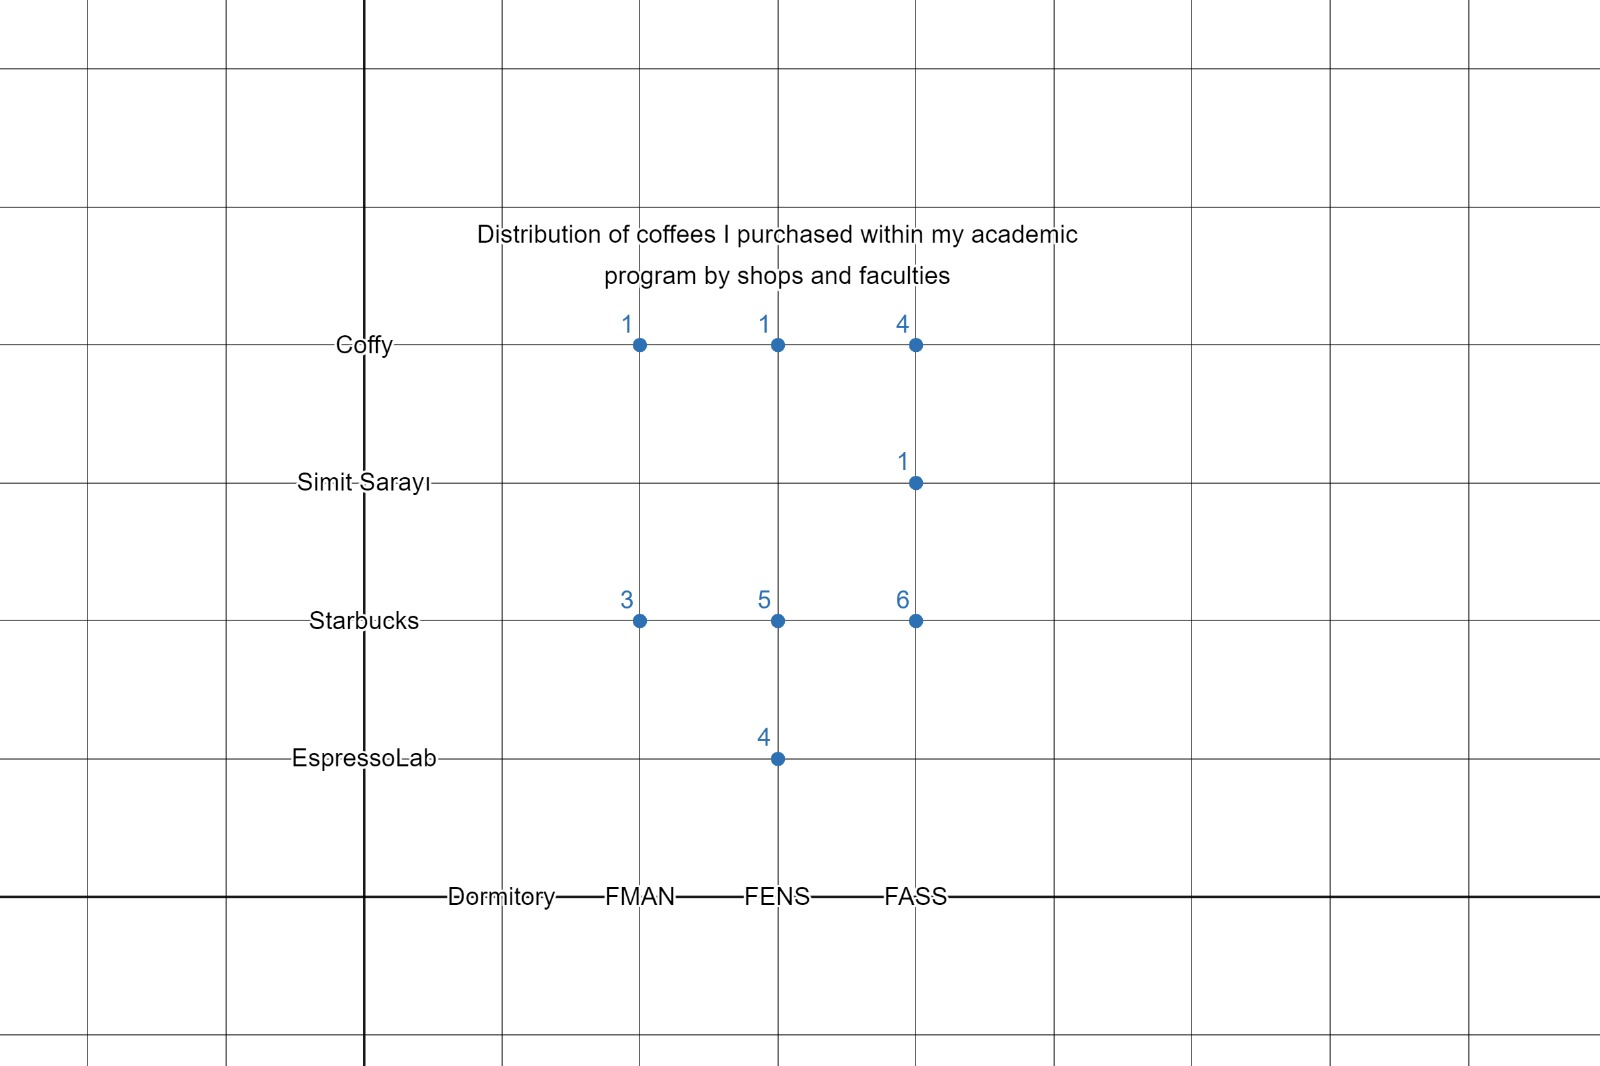